0.64


C:\Users\Aaron\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


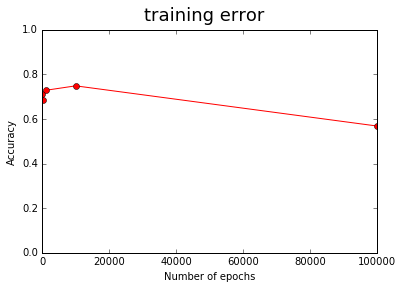

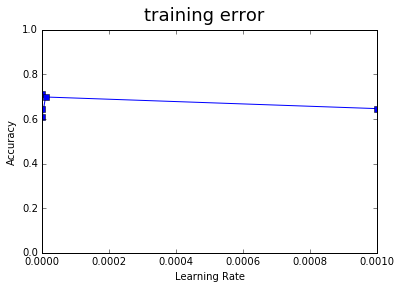

In [4]:
from sklearn.linear_model import Perceptron
from sklearn import metrics
import pandas
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import cross_validation as cv
import matplotlib.pyplot as plt
%matplotlib inline

soccer_data = pandas.read_csv('topfiveteams.csv', encoding = "ISO-8859-1")
#print(soccer_data)

(soccer_train, soccer_test) = cv.train_test_split(soccer_data, test_size = .2)
#print(soccer_test)



#rfc = RFC()

predictors = ['AGE', 'GS', "SB", "G", "SH", 'SG', 'A', 'FC', 'FS', 'YC', 'RC']

#rfc.fit(soccer_train[predictors], soccer_train["National_Team"])


perc = Perceptron(n_iter = 100, eta0 = .0000001)

perc.fit(soccer_train[predictors], soccer_train['National_Team'])
soccer_perc_predictions = perc.predict(soccer_test[predictors])
print(metrics.accuracy_score(soccer_test['National_Team'], soccer_perc_predictions))

xvals = [1,100,1000,10000,100000, 1000000]
series1 = [.712,.684,.728,.748,.568, .596]
#series2 = [.8,.83,.77,.81,.79]
plt.suptitle('training error',fontsize=18)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.plot(xvals,series1,'ro-')
#plt.plot(xvals,series2,'bs-',label='testing set')
plt.legend(loc='lower right', shadow=True)
plt.axis([0, 100000, 0, 1])
plt.show()


xvals = [.00000000001, .000000001, .0000001, .00001, .001, 1]
series1 = [.71, .646, .61, .698, .646, .712]
#series2 = [.8,.83,.77,.81,.79]
plt.suptitle('training error',fontsize=18)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.plot(xvals,series1,'bs-')
#plt.plot(xvals,series2,'bs-',label='testing set')
plt.legend(loc='lower right', shadow=True)
plt.axis([.00000000001, .001, 0, 1])
plt.show()
